In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import datetime

In [58]:
df = pd.read_csv(r"D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Data\frankfurt_final.csv")
df_w = pd.read_csv(r"D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Data\frankfurt_weather.csv")

Trip Count

Testing

In [ ]:
data = pd.DataFrame()
data['time']= df.weekday

# data = data.groupby([data['time']]).mean()
data['time'] = df.weekday.value_counts()
# data.sort_values('time', inplace=True)
data.sort_index(inplace=True)
data

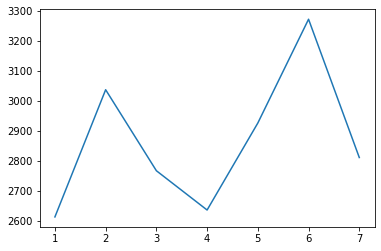

In [4]:
plt.plot(data.index, data['time'], label='Weekday Usage')
plt.show()

In [6]:
data = pd.DataFrame()
data['date'] = df.day
data.sort_values('date', inplace=True)
data = data.groupby(data.date)

#Andere vorher 
data = data.groupby([data['Precip']]).mean()


data.head()

,date
6342,2019-02-01 01:28:00
19456,2019-02-01 03:37:00
5637,2019-02-01 05:26:00
8532,2019-02-01 06:54:00
13004,2019-02-01 07:11:00
...,...
12551,2019-06-30 22:50:00
1730,2019-06-30 22:53:00
17765,2019-06-30 23:02:00
13244,2019-06-30 23:08:00


Monthly

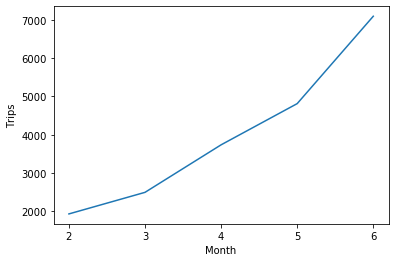

In [23]:
data_m = pd.DataFrame()
data_m['month'] = df.month.value_counts()
data_m.sort_index(inplace=True)
plt.plot(data_m.index, data_m.month, label='Trips in each Month')
plt.ylabel('Trips')
plt.xlabel('Month')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_month.png')
plt.show()

Weekday

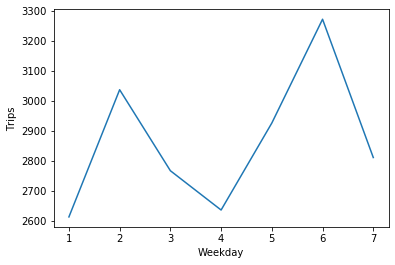

In [22]:
data_w = pd.DataFrame()
data_w['weekday'] = df.weekday.value_counts()
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.weekday, label='Trips on each Weekday')
plt.ylabel('Trips')
plt.xlabel('Weekday')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_weekday.png')
plt.show()

Daily

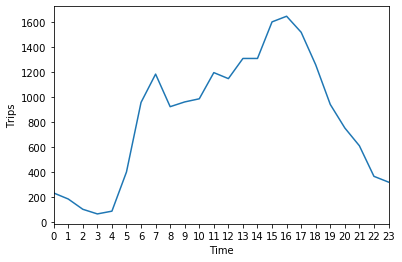

In [26]:
data_d = pd.DataFrame()
data_d['hour'] = df.hour.value_counts()
data_d.sort_index(inplace=True)
plt.plot(data_d.index, data_d.hour, label='Trips in each hour')
plt.ylabel('Trips')
plt.xlabel('Time')
plt.xlim(0, 23)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_hour.png')
plt.show()

Temperature

In [60]:
def replace_minutes(dt):
    return dt.replace(minute=0)

In [66]:
df.rename(columns={'day':'datetime'}, inplace=True)
df.datetime = pd.to_datetime(df.datetime)
df_w.datetime = pd.to_datetime(df_w.datetime)
# df.datetime = df['datetime'].astype('datetime64')

In [64]:
# type(df.datetime[0])
# df.datetime = df.datetime.replace(minute=0)
df.datetime = df.datetime.apply(replace_minutes)

In [68]:
df = pd.merge(df, df_w, how="left", on =["datetime"])

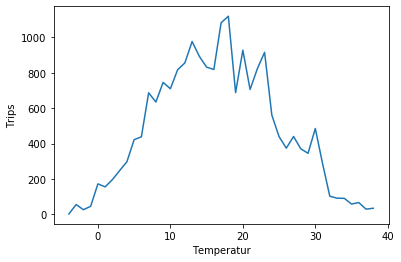

In [71]:
data_d = pd.DataFrame()
df.temperature = df.temperature.astype(int)
data_d['temp'] = df.temperature.value_counts()
data_d.sort_index(inplace=True)
plt.plot(data_d.index, data_d.temp, label='Trips fro each Temperature')
plt.ylabel('Trips')
plt.xlabel('Temperatur')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_temp.png')
plt.show()

Precipitation

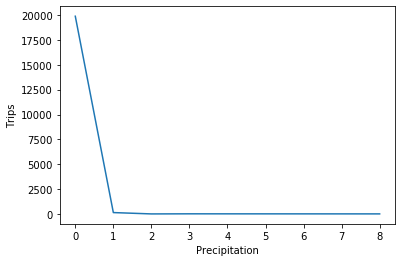

In [73]:
data_d = pd.DataFrame()
df.precipitation = df.precipitation.astype(int)
data_d['prec'] = df.precipitation.value_counts()
data_d.sort_index(inplace=True)
plt.plot(data_d.index, data_d.prec, label='Trips fro each Precipitation')
plt.ylabel('Trips')
plt.xlabel('Precipitation')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_prec.png')
plt.show()
